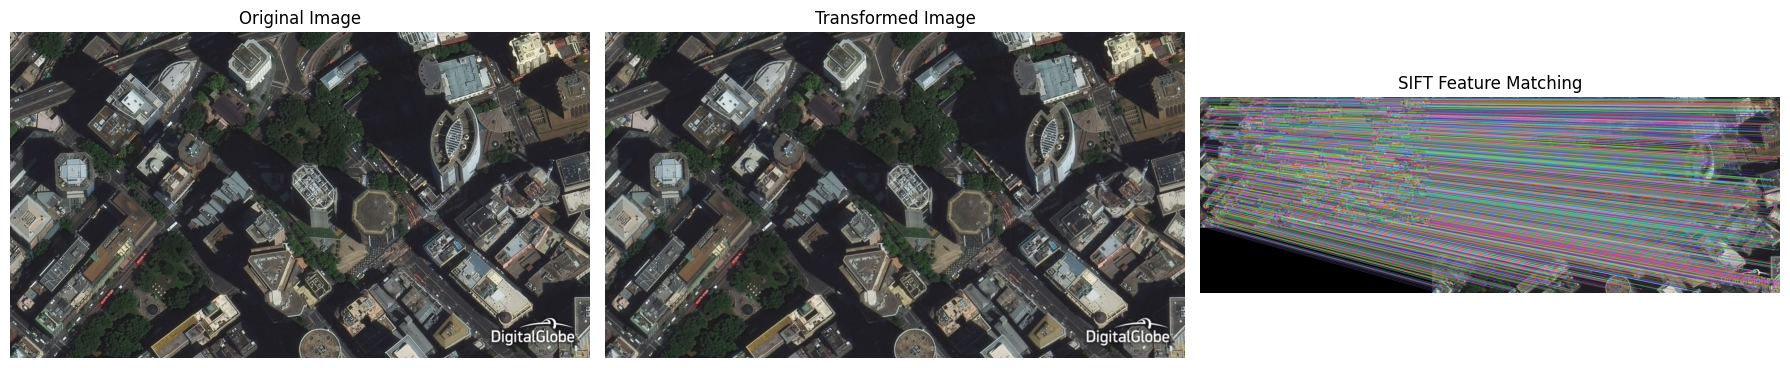

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Provide your image filenames here (ensure they are uploaded or accessible)
image1_path = 'house.jpg'
image2_path = 'house1.png'
# Load images
img1 = cv2.imread(image1_path)
img2 = cv2.imread(image2_path)

# Validate image loading
if img1 is None or img2 is None:
    raise FileNotFoundError("One or both images not found. Make sure the file paths are correct and uploaded.")

# Convert to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and descriptors
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

# FLANN based matcher parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

# Lowe's ratio test to filter good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

# Draw matches
matched_img = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=2)

# Display the result
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title("Transformed Image")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB))
plt.title("SIFT Feature Matching")
plt.axis('off')

plt.tight_layout()
plt.show()
